이미지 비교 결과
- 전체 픽셀 수: 298116
- 동일한 픽셀 수: 48282
- 다른 픽셀 수: 249834
- 픽셀 간 평균 차이(0에 가까울수록 유사): 1.11


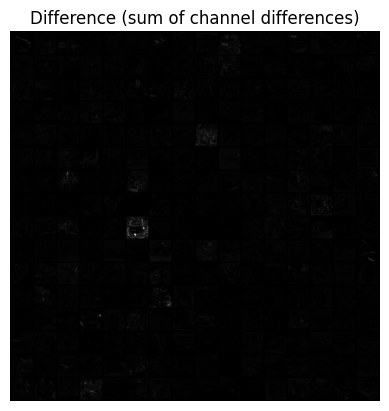

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def compare_images(image_path_1, image_path_2):
    # 이미지 열기
    img1 = Image.open(image_path_1).convert('RGBA')
    img2 = Image.open(image_path_2).convert('RGBA')
    
    # 두 이미지의 크기가 같은지 확인
    if img1.size != img2.size:
        raise ValueError("두 이미지의 크기가 서로 다릅니다. 같은 크기의 이미지를 비교하세요.")
    
    # NumPy 배열로 변환
    arr1 = np.array(img1)
    arr2 = np.array(img2)
    
    # 픽셀별 차이(절댓값)
    diff = np.abs(arr1.astype(np.int32) - arr2.astype(np.int32))  # (H, W, RGBA)
    
    # 픽셀 간 평균 차이 계산
    mean_diff = np.mean(diff)
    
    # 두 이미지가 동일한 픽셀이 몇 개인지 계산 (RGBA 각 채널이 모두 같아야 동일)
    same_pixels = np.sum(np.all(arr1 == arr2, axis=-1))
    total_pixels = arr1.shape[0] * arr1.shape[1]
    
    # 결과 출력
    print("이미지 비교 결과")
    print(f"- 전체 픽셀 수: {total_pixels}")
    print(f"- 동일한 픽셀 수: {same_pixels}")
    print(f"- 다른 픽셀 수: {total_pixels - same_pixels}")
    print(f"- 픽셀 간 평균 차이(0에 가까울수록 유사): {mean_diff:.2f}")
    
    # 차이 이미지를 시각화 (R, G, B 등 채널별 차이의 합)
    # diff[..., :3] 은 RGBA 중 RGB에 해당하고, 이를 채널별로 더해주어 차이가 큰 곳이 밝게 표현되도록 함
    diff_gray = np.sum(diff[..., :3], axis=-1)
    
    # 시각화
    plt.figure()
    plt.title("Difference (sum of channel differences)")
    plt.imshow(diff_gray, cmap='gray')
    plt.axis('off')
    plt.show()

# 사용 예시
# 이미지 경로를 자신의 PNG 파일 경로로 바꿔주세요.
compare_images("../samples/checkpoint_8/sample_grid/rbf_unipc_20/sample.png",
               "../samples/checkpoint_8/sample_grid/UniPC_bh1_20/sample.png")
